In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import StandardScaler, RobustScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [252]:
data = pd.read_csv('diabetes.csv')

In [253]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [254]:
data.shape

(768, 9)

In [255]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [256]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

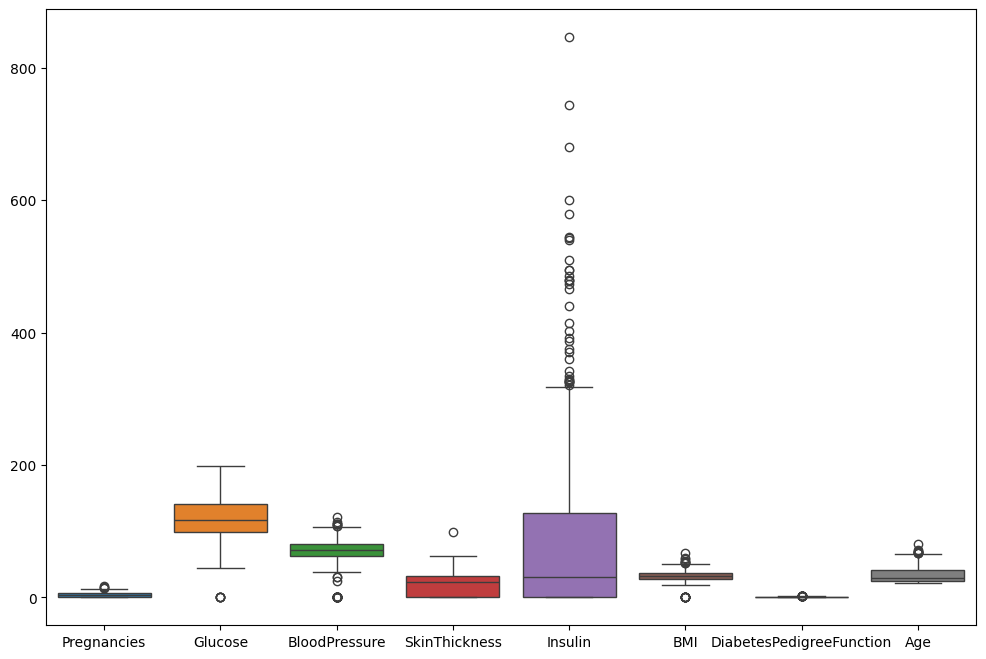

In [257]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=["Outcome"]))
plt.show()

In [258]:
rob_scaler = RobustScaler()
X = rob_scaler.fit_transform(data.drop(columns=['Outcome']))
Y = data['Outcome']

### 70/30 split

In [259]:
x_train_70, x_test_30, y_train_70, y_test_30 = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [260]:
lr_70_30 = LogisticRegression()
lr_70_30.fit(x_train_70, y_train_70)

y_predict_30 = lr_70_30.predict(x_test_30)

In [261]:
lr_70_30_train_score = lr_70_30.score(x_train_70, y_train_70)
lr_70_30_test_score = lr_70_30.score(x_test_30, y_test_30)
print(lr_70_30_train_score)
print(lr_70_30_test_score)

0.7839851024208566
0.7359307359307359


In [262]:
error_rates = []
k_values = range(1, 101)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_70, y_train_70)  # Train the model
    y_pred = knn.predict(x_test_30)  # Predict on test set
    error = 1 - accuracy_score(y_test_30, y_pred)  # Calculate error rate
    error_rates.append(error)

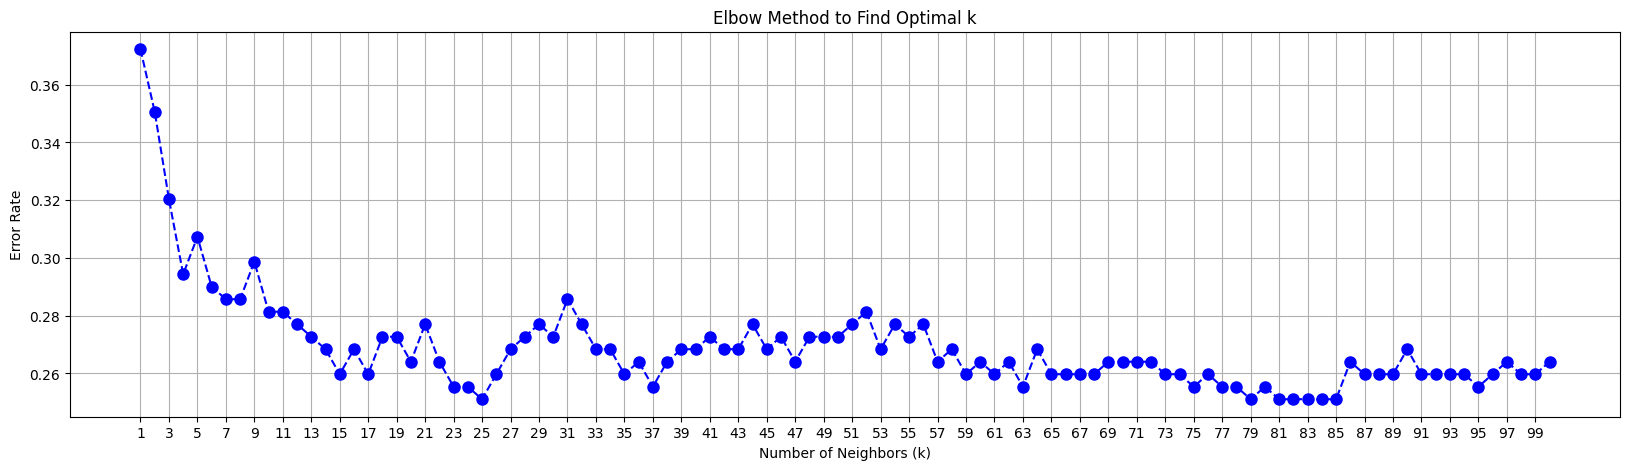

In [263]:
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 101, step=2))
plt.grid(True)
plt.show()

In [264]:
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(x_train_70, y_train_70)  # Train the model
y_pred_15 = knn_15.predict(x_test_30)  # Predict on test set
print(accuracy_score(y_test_30, y_pred_15))

0.7402597402597403


In [265]:
knn_25 = KNeighborsClassifier(n_neighbors=25)
knn_25.fit(x_train_70, y_train_70)  # Train the model
y_pred_25 = knn_25.predict(x_test_30)  # Predict on test set
print(accuracy_score(y_test_30, y_pred_25))

0.7489177489177489


In [266]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [267]:
#Calculate cross validation score k=12 and k=16
score_k_15 = cross_val_score(knn_15, x_train_70, y_train_70, cv=5)
score_k_25 = cross_val_score(knn_25, x_train_70, y_train_70, cv=5)
avg_score_k_15 = mean(score_k_15)
avg_score_k_25 = mean(score_k_25)

print(f"Average score for 15 neighbors: {avg_score_k_15}")
print(f"Average score for 25 neighbors: {avg_score_k_25}")

Average score for 15 neighbors: 0.7634994807892004
Average score for 25 neighbors: 0.7634648667358948
